## 1. Loading and Visualizing the Traffic Light Dataset

In [1]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

In [2]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)

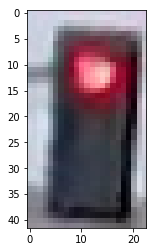

In [4]:
# The first image in IMAGE_LIST is displayed below (without information about shape or label)
selected_image = IMAGE_LIST[0][0]
plt.imshow(selected_image)

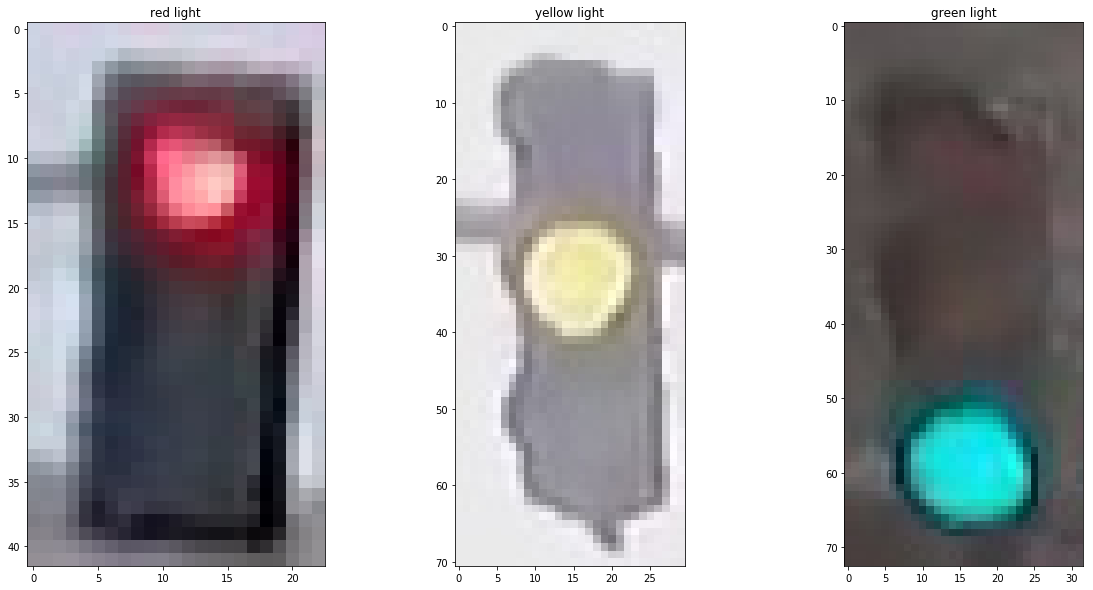

In [5]:
## TODO: Write code to display an image in IMAGE_LIST (try finding a yellow traffic light!)
## TODO: Print out 1. The shape of the image and 2. The image's label

# ANSWER: Below I have created 3 sub plots, and plotted each image type, along with type as Title.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

# red image
num = 0 # 0 to 722 is red 
red_image = IMAGE_LIST[num][0]
red_label = IMAGE_LIST[num][1]
ax1.set_title(red_label + ' light')
ax1.imshow(red_image)

# yellow image
num = 723  # 723 to 757 is yellow 
yellow_image = IMAGE_LIST[num][0]
yellow_label = IMAGE_LIST[num][1]
ax2.set_title(yellow_label + ' light')
ax2.imshow(yellow_image)

# green image
num = 758 # 758 to 1187 is green  
green_image = IMAGE_LIST[num][0]
green_label = IMAGE_LIST[num][1]
ax3.set_title(green_label + ' light')
ax3.imshow(green_image)

**Hint:** To download folder from Udacity..

In [6]:
# download images for working in local PC (useful to download folder from udacity)
#!tar chvfz notebook.tar.gz *

## Preprocess

### (IMPLEMENTATION): Standardize the input images

In [7]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image and pre-process so that all "standard" images are the same size  
    standard_im = np.copy(image)
    
    standard_im = cv2.resize(image, (32,32))
    
    return standard_im

### (IMPLEMENTATION): Implement one-hot encoding

In [8]:
## TODO: One hot encode an image label
## Given a label - "red", "green", or "yellow" - return a one-hot encoded label

# Examples: 
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("yellow") should return: [0, 1, 0]
# one_hot_encode("green") should return: [0, 0, 1]

def one_hot_encode(label):
    
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [0 , 0 , 0] 
    
    if label is 'red':
        one_hot_encoded[0] = 1        
    elif label is 'yellow':
        one_hot_encoded[1] = 1
    else: #green
        one_hot_encoded[2] = 1  
    
    return one_hot_encoded

In [9]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)

**<span style="color: green;">TEST PASSED</span>**

## Construct a `STANDARDIZED_LIST` of input images and output labels.

In [10]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

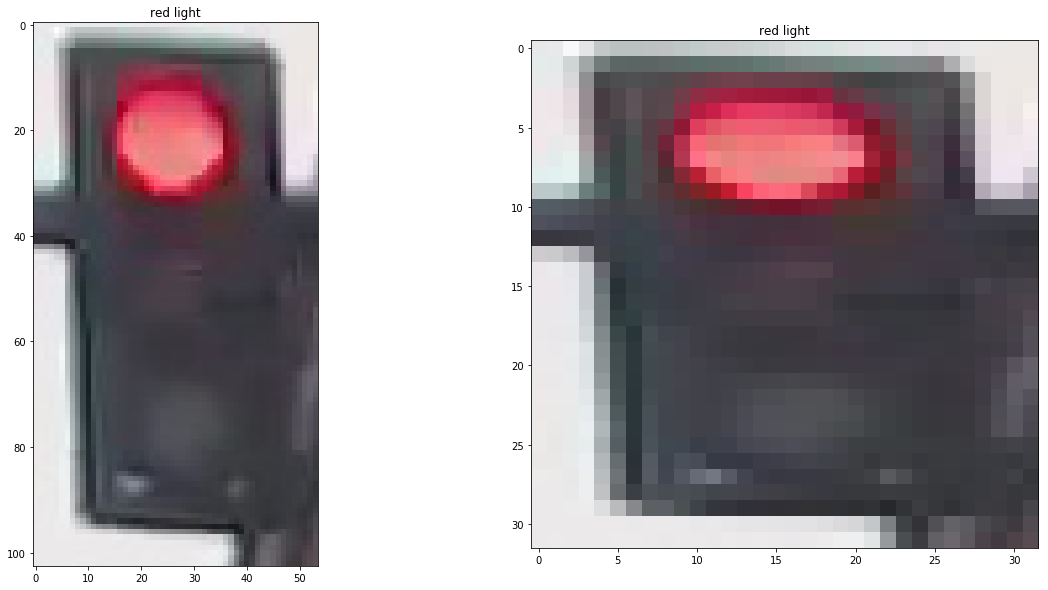

In [11]:
## TODO: Display a standardized image and its label

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# non standardized image
num = 23
red_image = IMAGE_LIST[num][0]
red_label = 'red'
ax1.set_title(red_label + ' light')
ax1.imshow(red_image)

# standardized image
red_image = STANDARDIZED_LIST[num][0]
red_label = 'red'
ax2.set_title(red_label + ' light')
ax2.imshow(red_image)

Let us try to visualize all images at once.. 

In [12]:
# SIMPLE ATTEMPT 1 - WORKS
#import imageio
#num =23
#red_image = STANDARDIZED_LIST[num][0]  # numpy array of image number 23
#imageio.imwrite('test.png',red_image) 

In [13]:
import glob # library for loading images from a directory
import imageio
import time
from IPython.display import Image, display

red_images = []    
yellow_images = []
green_images = []
for each_image_label_pair in STANDARDIZED_LIST:  
    image = each_image_label_pair[0]
    label = each_image_label_pair[1]
    if label[0] == 1:
        red_images.append(image)
    elif label[1] == 1:
        yellow_images.append(image)
    else:
        green_images.append(image)

imageio.mimsave('red_training_raw.gif', red_images, duration=0.5) 
imageio.mimsave('yellow_training_raw.gif', yellow_images, duration=0.5) 
imageio.mimsave('green_training_raw.gif', green_images, duration=0.5) 

In [14]:
from IPython.display import HTML
html = '''
<br><div style='display:flex'>
    <div style="width:115px; height:40px"><img src="{}" style="transform:scale(1.5);"></div><pre>    </pre>
    <div style="width:115px; height:40px"><img src="{}" style="transform:scale(1.5);"></div><pre>    </pre>
    <div style="width:115px; height:40px"><img src="{}" style="transform:scale(1.5);"></div>
</div>
'''
HTML(html.format('./red_training_raw.gif', './yellow_training_raw.gif', './green_training_raw.gif'))

1. red is almost on top all images. So is yellow in middle, green on bottom.
2. some are even having arrows, so have to be careful there.

The rest of the images is majorly black, with some portions showing background. We shall first mask for the colors and check how that looks. Let us test for one image.

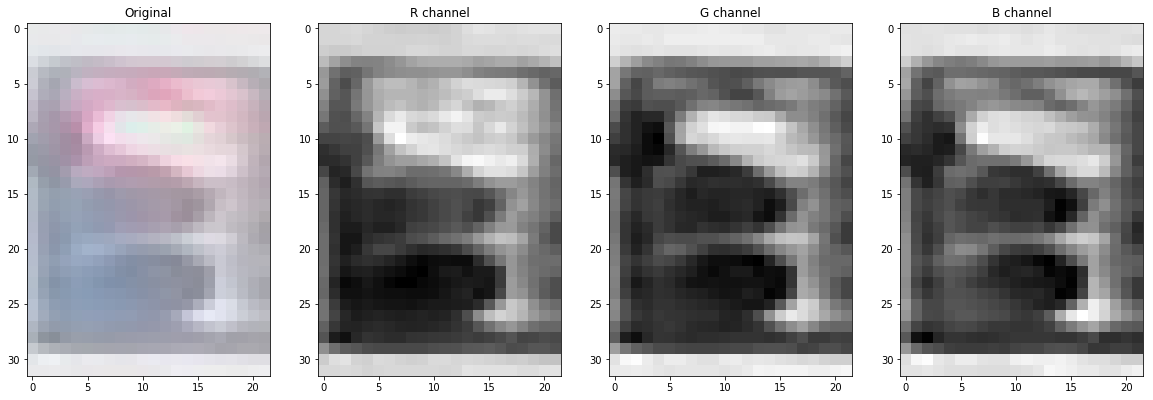

In [15]:
%matplotlib inline 
# 723 to 757 is yellow 
num = 55
image = STANDARDIZED_LIST[num][0]
label = 'red'

#crop and check
image = image[:, 5:-5, :]

# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(image)
ax2.set_title('R channel')
ax2.imshow(r, cmap='gray')
ax3.set_title('G channel')
ax3.imshow(g, cmap='gray')
ax4.set_title('B channel')
ax4.imshow(b, cmap='gray')

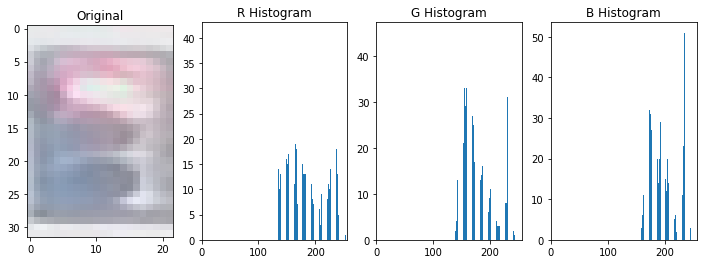

In [16]:
# ref: https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html
def rgb_histograms(rgb_image):
    # Convert to HSV
    #hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Create color channel histograms
    r_hist = np.histogram(rgb_image[:,:,0], bins=128, range=(0, 256))
    g_hist = np.histogram(rgb_image[:,:,1], bins=128, range=(0, 256))
    b_hist = np.histogram(rgb_image[:,:,2], bins=128, range=(0, 256))
    
    # Generating bin centers
    bin_edges = r_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Plot a figure with all three histograms (and original image)
    fig = plt.figure(figsize=(12,4))
    
    
    plt.subplot(141)
    plt.imshow(rgb_image)   
    #plt.xlim(0, 256)
    plt.title('Original')
    
    plt.subplot(142)
    plt.bar(bin_centers, r_hist[0])    
    plt.xlim(0, 256)
    plt.title('R Histogram')
    
    plt.subplot(143)
    plt.bar(bin_centers, g_hist[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    
    plt.subplot(144)
    plt.bar(bin_centers, b_hist[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    
    return r_hist, g_hist, b_hist

night_r_hist, night_g_hist, night_b_hist = rgb_histograms(image)

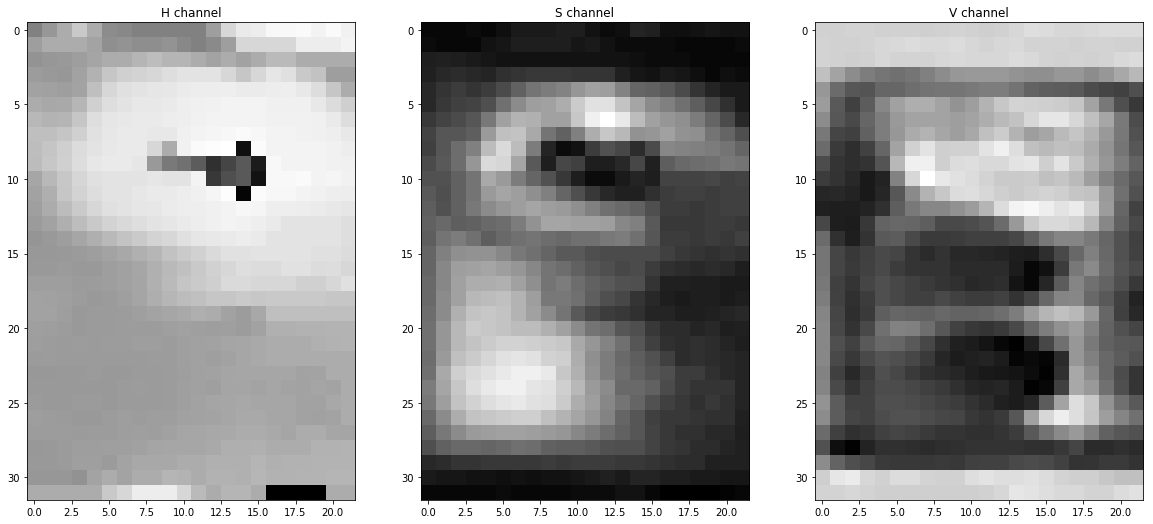

In [17]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = image_hsv[:,:,0]
s = image_hsv[:,:,1]
v = image_hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

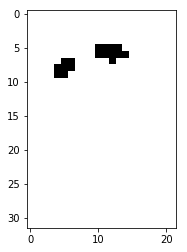

In [18]:
if label is 'red':
    red_mask_hsv1 = cv2.inRange(image_hsv, (0,50,50), (12,255,255))
    red_mask_hsv2 = cv2.inRange(image_hsv, (150,50,50), (180,255,255))
    red_mask_hsv = red_mask_hsv1 + red_mask_hsv2
    mask_hsv = red_mask_hsv
elif label is 'yellow':
    #yellow_mask_hsv1 = cv2.inRange(image_hsv, (0,0,50), (100,255,255))
    #yellow_mask_hsv2 = cv2.inRange(image_hsv, (145,0,50), (180,255,255))    
    mask_hsv = cv2.inRange(image_hsv, (21,18,210),(31,255,255))
    #mask_hsv = yellow_mask_hsv1 + yellow_mask_hsv2
else:
    mask_hsv = cv2.inRange(image_hsv,(33,21,200),(100,255,255))

mask_hsv = cv2.bitwise_not(mask_hsv)  # invert the mask
plt.imshow(mask_hsv, cmap='gray')

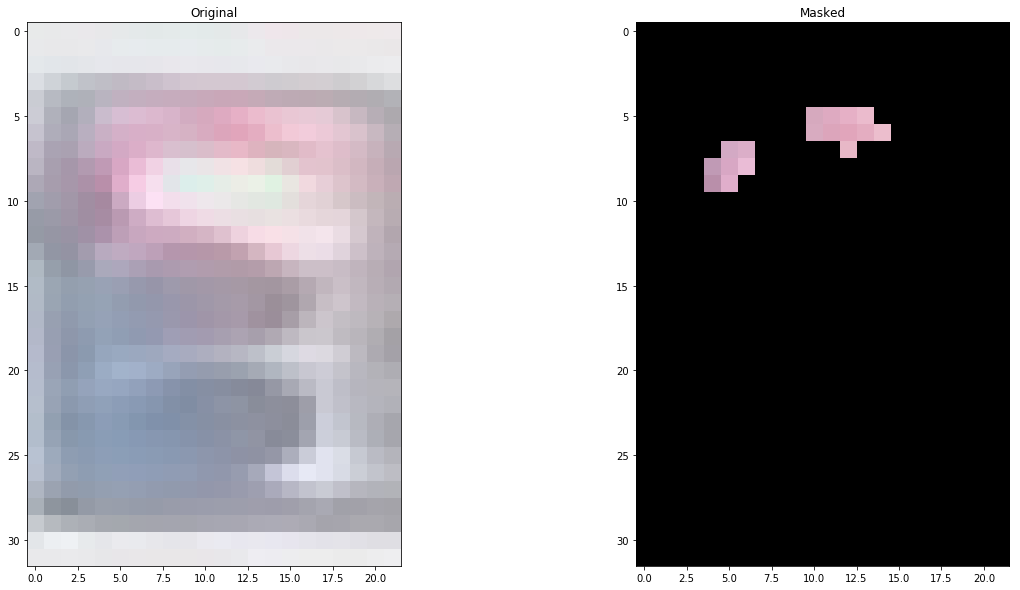

In [19]:
masked_image = np.copy(image)
masked_image[mask_hsv != 0] = [0, 0, 0]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(image, cmap='gray')
ax2.set_title('Masked')
ax2.imshow(masked_image, cmap='gray')

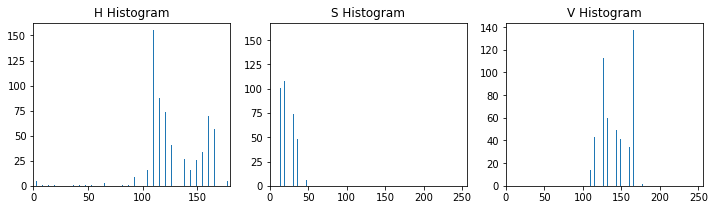

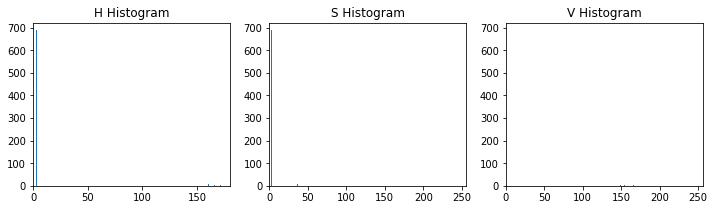

In [20]:
def hsv_histograms(rgb_image):
    # Convert to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Create color channel histograms
    h_hist = np.histogram(hsv[:,:,0], bins=32, range=(0, 180))
    s_hist = np.histogram(hsv[:,:,1], bins=32, range=(0, 256))
    v_hist = np.histogram(hsv[:,:,2], bins=32, range=(0, 256))
    
    # Generating bin centers
    bin_edges = h_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Plot a figure with all three histograms
    fig = plt.figure(figsize=(12,3))
    
    plt.subplot(131)
    plt.bar(bin_centers, h_hist[0])    
    plt.xlim(0, 180)
    plt.title('H Histogram')
    
    plt.subplot(132)
    plt.bar(bin_centers, s_hist[0])
    plt.xlim(0, 256)
    plt.title('S Histogram')
    
    plt.subplot(133)
    plt.bar(bin_centers, v_hist[0])
    plt.xlim(0, 256)
    plt.title('V Histogram')
    
    return h_hist, s_hist, v_hist

h_hist, s_hist, v_hist = hsv_histograms(image)
h_hist, s_hist, v_hist = hsv_histograms(masked_image)
#print(v_hist)

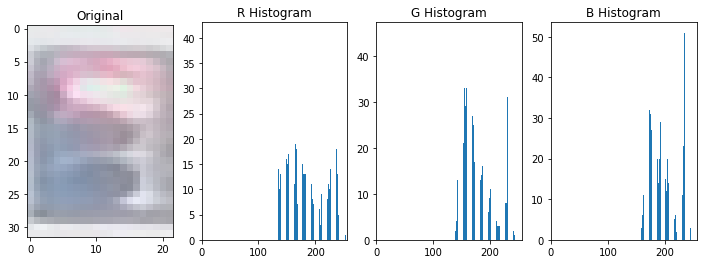

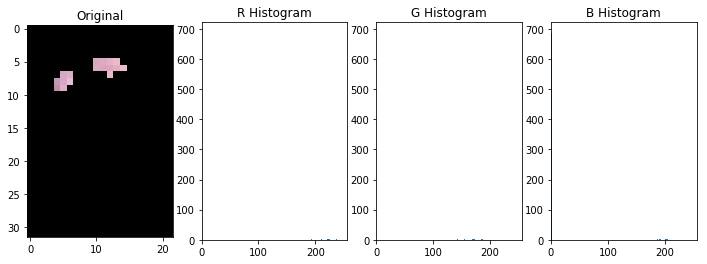

In [21]:
r_hist, g_hist, b_hist = rgb_histograms(image)
r_hist, g_hist, b_hist = rgb_histograms(masked_image)
#print(r_hist)

There seems to be no point doing histograms on image or mask. We need brightness histogram? 

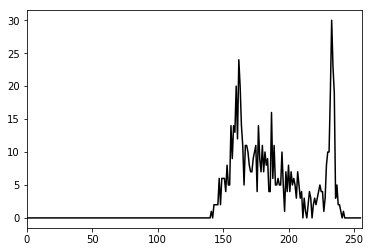

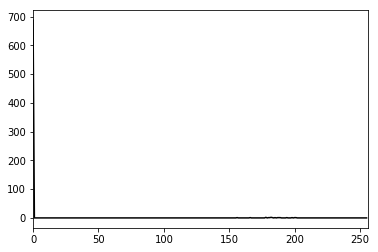

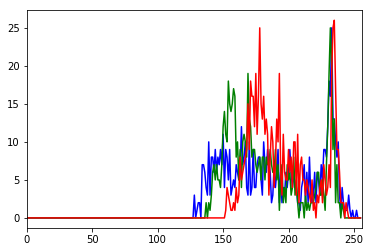

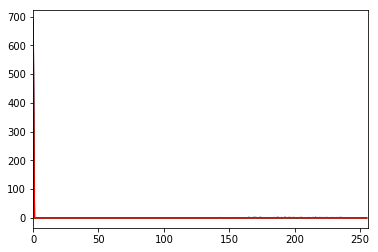

In [22]:
#https://lmcaraig.com/image-histograms-histograms-equalization-and-histograms-comparison/
    
def draw_image_histogram(image, channels, color='k'):
    hist = cv2.calcHist([image], channels, None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    
def show_grayscale_histogram(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    draw_image_histogram(grayscale_image, [0])
    plt.show()
    
def show_color_histogram(image):
    for i, col in enumerate(['b', 'g', 'r']):
        draw_image_histogram(image, [i], color=col)
    plt.show()    
    
show_grayscale_histogram(image)
show_grayscale_histogram(masked_image)

show_color_histogram(image)
show_color_histogram(masked_image)

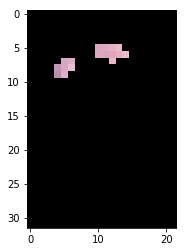

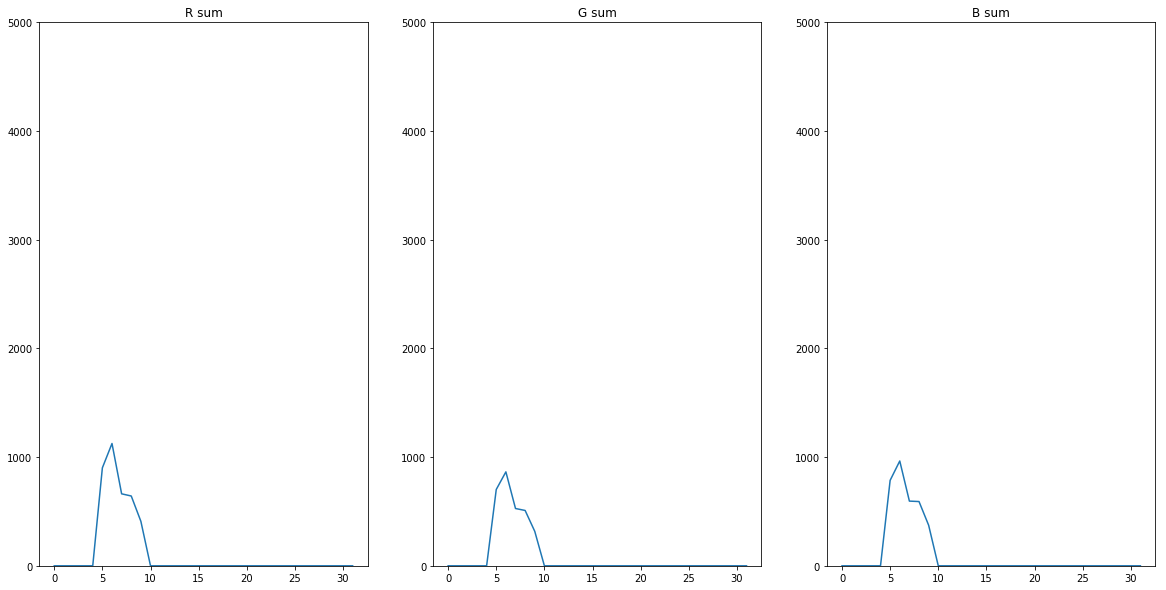

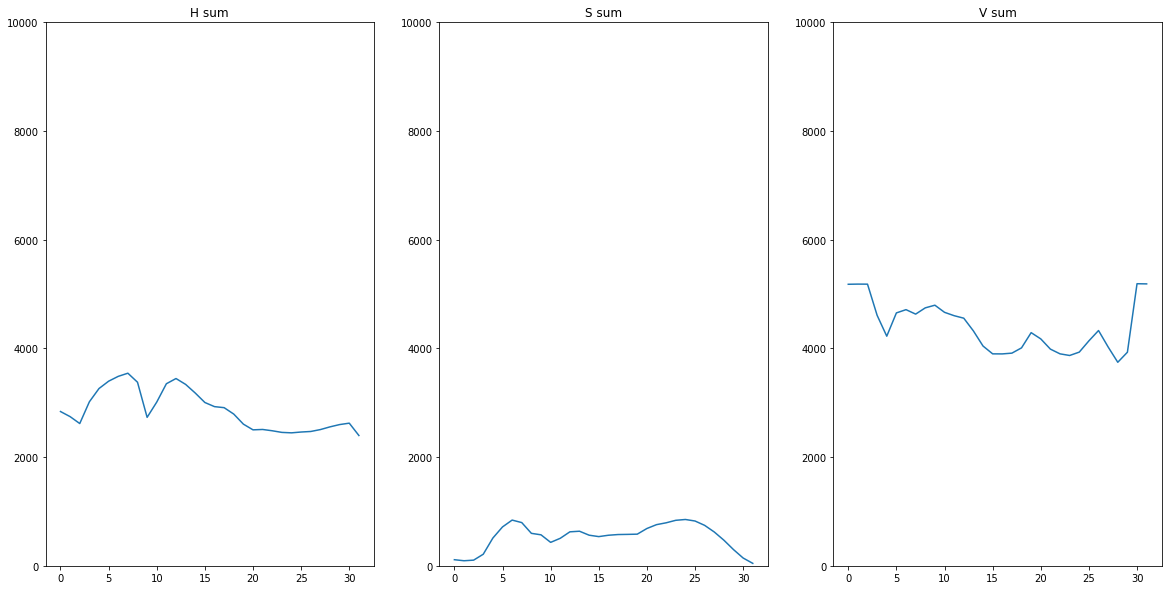

In [23]:
plt.imshow(masked_image)

r = masked_image[:,:,0]
g = masked_image[:,:,1]
b = masked_image[:,:,2]

r_sum = np.sum(r[:,:],axis=1)
g_sum = np.sum(g[:,:],axis=1)
b_sum = np.sum(b[:,:],axis=1)

ymax = 5000
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R sum')
ax1.set_ylim([0,ymax])
ax1.plot(r_sum)

ax2.set_title('G sum')
ax2.set_ylim([0,ymax])
ax2.plot(g_sum)

ax3.set_title('B sum')
ax3.set_ylim([0,ymax])
ax3.plot(b_sum)

masked_image_hsv = cv2.cvtColor(masked_image, cv2.COLOR_RGB2HSV)

# HSV channels
h = image_hsv[:,:,0]
s = image_hsv[:,:,1]
v = image_hsv[:,:,2]

h_sum = np.sum(h[:,:],axis=1)
s_sum = np.sum(s[:,:],axis=1)
v_sum = np.sum(v[:,:],axis=1)

ymax = 10000
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H sum')
ax1.set_ylim([0,ymax])
ax1.plot(h_sum)

ax2.set_title('S sum')
ax2.set_ylim([0,ymax])
ax2.plot(s_sum)

ax3.set_title('V sum')
ax3.set_ylim([0,ymax])
ax3.plot(v_sum)

In [24]:
import numpy as np
import cv2

#ref: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
#take [H-10, 100,100] and [H+10, 255, 255]
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)
print('green: {}'.format(hsv_green))

red = np.uint8([[[255,0,0 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_RGB2HSV)
print('red: {}'.format(hsv_red))

yellow = np.uint8([[[0,255,255 ]]])
hsv_yellow = cv2.cvtColor(yellow,cv2.COLOR_RGB2HSV)
print('yellow: {}'.format(hsv_yellow))

green: [[[ 60 255 255]]]
red: [[[  0 255 255]]]
yellow: [[[ 90 255 255]]]
